# Group spectral-peak detections on all geophone stations by time and frequency

In [1]:
# Imports
from os.path import join
from numpy import linspace
from pandas import read_csv, date_range, Timestamp, Timedelta

from utils_basic import SPECTROGRAM_DIR as indir, GEO_STATIONS as stations
from utils_spec import assemble_spec_filename, group_spectral_peaks, read_geo_spectrograms, find_geo_station_spectral_peaks, read_spectral_peaks, bin_counts_to_df
from utils_plot import plot_array_spec_peak_bin_counts, save_figure

In [2]:
# Inputs
# Data
window_length = 60.0
overlap = 0.0
downsample = True
downsample_factor = 60
prom_threshold = 5
rbw_threshold = 0.2

# Grouping
starttime = "2020-01-10T00:00:00"
endtime = "2020-02-02T00:00:00"

time_bin_width = "1min"
freq_bin_width = 1.0 # in Hz
min_freq = 0.0
max_freq = 500.0

count_threshold = 4

# Plotting
size_scale = 40

In [3]:
# Read the spectral peaks
if downsample:
    filename_in = f"geo_spectral_peaks_window{window_length:.0f}s_overlap{overlap:.1f}_downsample{downsample_factor:d}_prom{prom_threshold:.0f}db_rbw{rbw_threshold:.1f}.csv"
else:
    filename_in = f"geo_spectral_peaks_window{window_length:.0f}s_overlap{overlap:.1f}_prom{prom_threshold:.0f}db_rbw{rbw_threshold:.1f}.csv"
    
inpath = join(indir, filename_in)
peak_df = read_spectral_peaks(inpath)

In [4]:
# Group the spectral peaks
time_bin_centers, freq_bin_centers, bin_counts = group_spectral_peaks(peak_df, starttime, endtime, time_bin_width = time_bin_width, freq_bin_width = freq_bin_width, min_freq = min_freq, max_freq = max_freq)

In [5]:
# Convert the bin counts to a DataFrame
count_df = bin_counts_to_df(time_bin_centers, freq_bin_centers, bin_counts, count_threshold)

In [6]:
# Save the bin counts
outdir = indir
filename_out = filename_in.replace("peaks", "peak_bin_counts")
outpath = join(outdir, filename_out)

count_df.to_csv(outpath, date_format = "%Y-%m-%dT%H:%M:%S.%f")

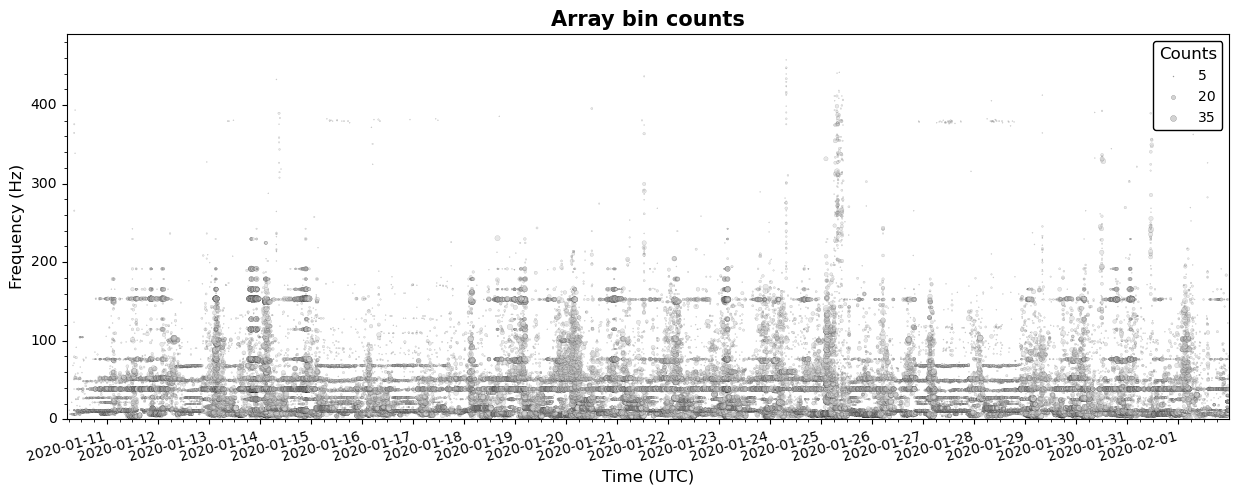

In [7]:
# Plot the results
fig, ax = plot_array_spec_peak_bin_counts(count_df, 
                                                size_scale = size_scale,
                                                date_format = "%Y-%m-%d", major_time_spacing = 24, minor_time_spacing = 6)

In [8]:
# Save the figure
filename_out = filename_out.replace(".csv", ".png")
save_figure(fig, filename_out)

Figure saved to /fp/projects01/ec332/data/figures/geo_spectral_peak_bin_counts_window60s_overlap0.0_downsample60_prom5db_rbw0.2.png
